# 1. Imports

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from get_data import init_column_map, pull, pull_data_rowwise

# 2. Descriptive Analytics

In [55]:
csv_file = './data/survey_pre_processed_data.csv'

In [13]:
init_column_map(csv_file)

In [25]:
# Frequency check for vehicle type:
q1_cols = ["Q1_1","Q1_2","Q1_3","Q1_4","Q1_99"]

for col in q1_cols:
    freq = pull(col, csv_file)  # returns a dictionary {answer_value: count}
    print(f"Frequency for {col} => {freq}")

# Other demographic variables
demo_cols = ["gender","colour_plus","region","Q21","Q22","AgeBand","Q24"]

for col in demo_cols:
    freq = pull(col, csv_file)
    print(f"Frequency for {col} => {freq}")

Frequency for Q1_1 => {'1': 874, '0': 484}
Frequency for Q1_2 => {'0': 590, '1': 768}
Frequency for Q1_3 => {'0': 1325, '1': 33}
Frequency for Q1_4 => {'0': 1247, '1': 111}
Frequency for Q1_99 => {'0': 1355, '1': 3}
Frequency for gender => {'Male': 859, 'Not Stated': 140, 'Female': 359}
Frequency for colour_plus => {'LILAC': 232, 'KHAKI': 275, 'PURPLE': 166, 'GREY': 353, 'ORANGE': 167, 'BROWN': 41, 'RED': 29, 'UNKNOWN': 8, 'YELLOW': 36, 'CYAN': 11, 'GREEN': 6}
Frequency for region => {'METROPOLITAN': 478, 'RURAL': 251, 'INTERSTATE': 221, 'REGIONAL': 403, 'UNKNOWN': 5}
Frequency for Q21 => {'Freestanding house': 1025, 'Townhouse': 71, 'Apartment/unit': 179, 'Semidetached or terrace': 62, 'Other (please specify)': 21}
Frequency for Q22 => {'Own outright': 919, 'Own with mortgage': 306, 'Other (please specify)': 31, 'Rent': 102}
Frequency for AgeBand => {'Prefer not to say': 36, '65+': 682, '55-64 years': 299, '45-54 years': 180, '35-44 years': 121, '25-34 years': 30, '18-24 years': 10}
F

In [26]:
# Let's pick a few columns to analyze together
columns_of_interest = q1_cols + demo_cols
rows_data = pull_data_rowwise(columns_of_interest, csv_file)

# Create a pandas DataFrame:
import pandas as pd

df = pd.DataFrame(rows_data, columns=columns_of_interest)

# Because Q1_x are '0' or '1' strings, let's convert them to numeric for easier ops
for c in q1_cols:
    df[c] = df[c].astype(int)  # convert '0'/'1' -> 0/1

print("Sample of the combined DataFrame:")
df

Sample of the combined DataFrame:


,Q1_1,Q1_2,Q1_3,Q1_4,Q1_99,gender,colour_plus,region,Q21,Q22,AgeBand,Q24
0,1,0,0,0,0,Male,LILAC,METROPOLITAN,Freestanding house,Own outright,Prefer not to say,Prefer not to say
1,1,1,0,0,0,Male,LILAC,RURAL,Freestanding house,Own outright,Prefer not to say,Prefer not to say
2,1,0,0,0,0,Not Stated,KHAKI,INTERSTATE,Townhouse,Own outright,65+,"$1000-2000 a week / $52,000-$104,000 a year"
3,0,0,0,1,0,Male,PURPLE,METROPOLITAN,Freestanding house,Own outright,55-64 years,Prefer not to say
4,1,1,0,1,0,Male,PURPLE,INTERSTATE,Freestanding house,Own with mortgage,45-54 years,Prefer not to say
...,...,...,...,...,...,...,...,...,...,...,...,...
1353,0,1,0,0,0,Female,KHAKI,REGIONAL,Townhouse,Own outright,55-64 years,Prefer not to say
1354,1,0,0,0,0,Male,LILAC,REGIONAL,Apartment/unit,Own outright,65+,"$1000-2000 a week / $52,000-$104,000 a year"
1355,1,1,0,0,0,Male,GREY,REGIONAL,Freestanding house,Own outright,65+,"$2000-3000 a week / $104,000-$156,000 a year"
1356,0,1,0,0,0,Male,LILAC,RURAL,Other (please specify),Other (please specify),65+,"Less than $500 a week / Less than $26,000 a year"


## 2.1. Demographics:

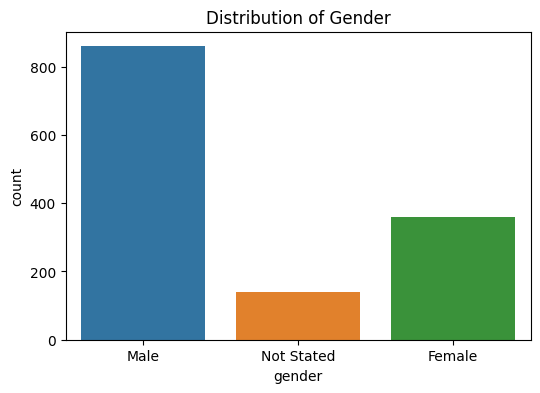

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df)
plt.title("Distribution of Gender")
plt.show()

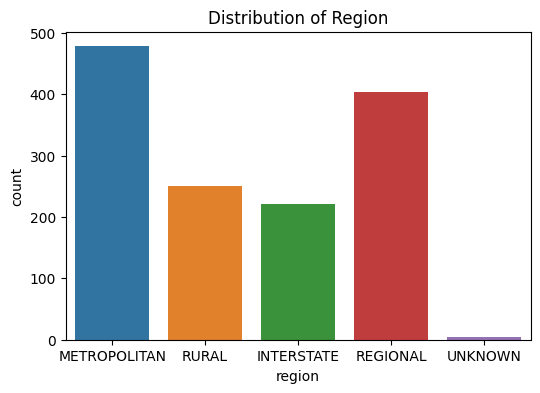

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="region", data=df)
plt.title("Distribution of Region")
plt.show()


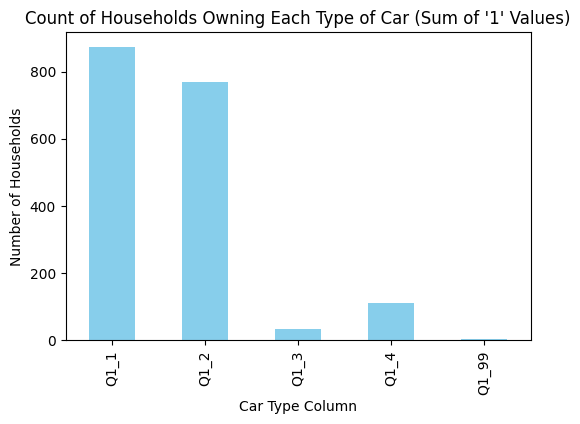

In [29]:
car_ownership_sums = df[q1_cols].sum()
car_ownership_sums.plot(kind='bar', figsize=(6,4), color='skyblue')
plt.title("Count of Households Owning Each Type of Car (Sum of '1' Values)")
plt.xlabel("Car Type Column")
plt.ylabel("Number of Households")
plt.show()

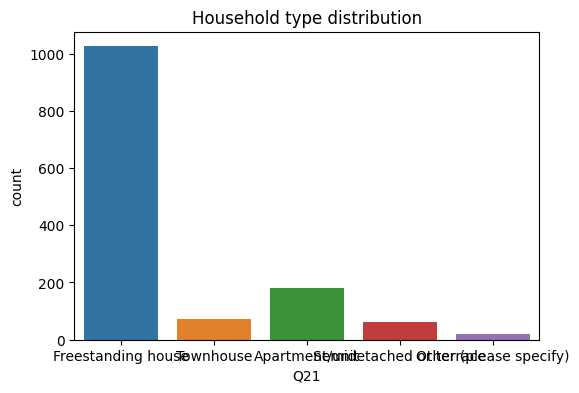

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x="Q21", data=df)
plt.title("Household type distribution")
plt.show()

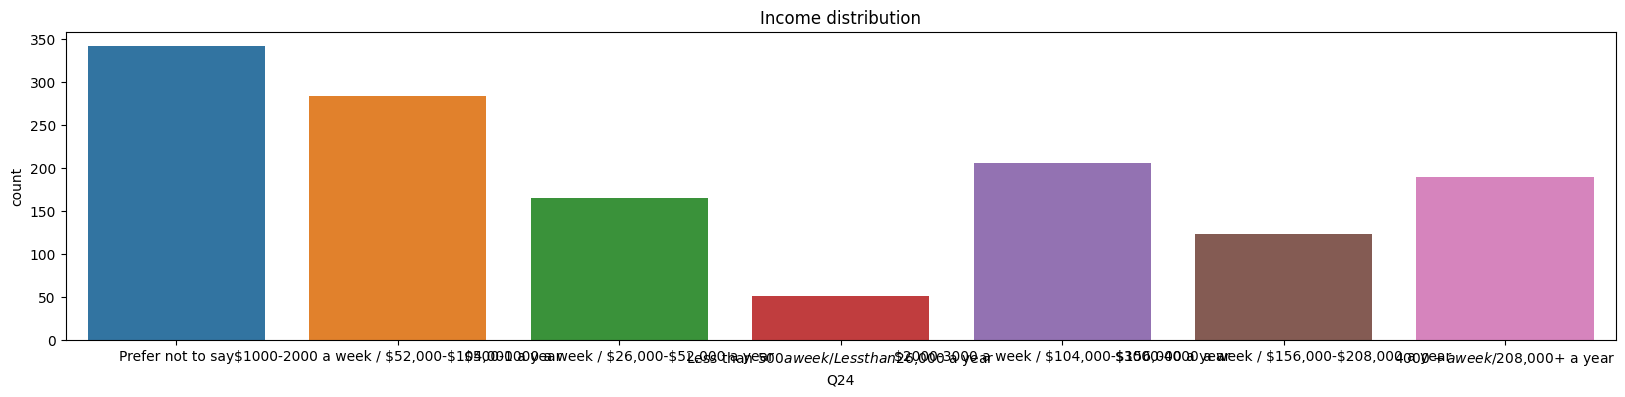

In [33]:
plt.figure(figsize=(20,4))
sns.countplot(x="Q24", data=df)
plt.title("Income distribution")
plt.show()

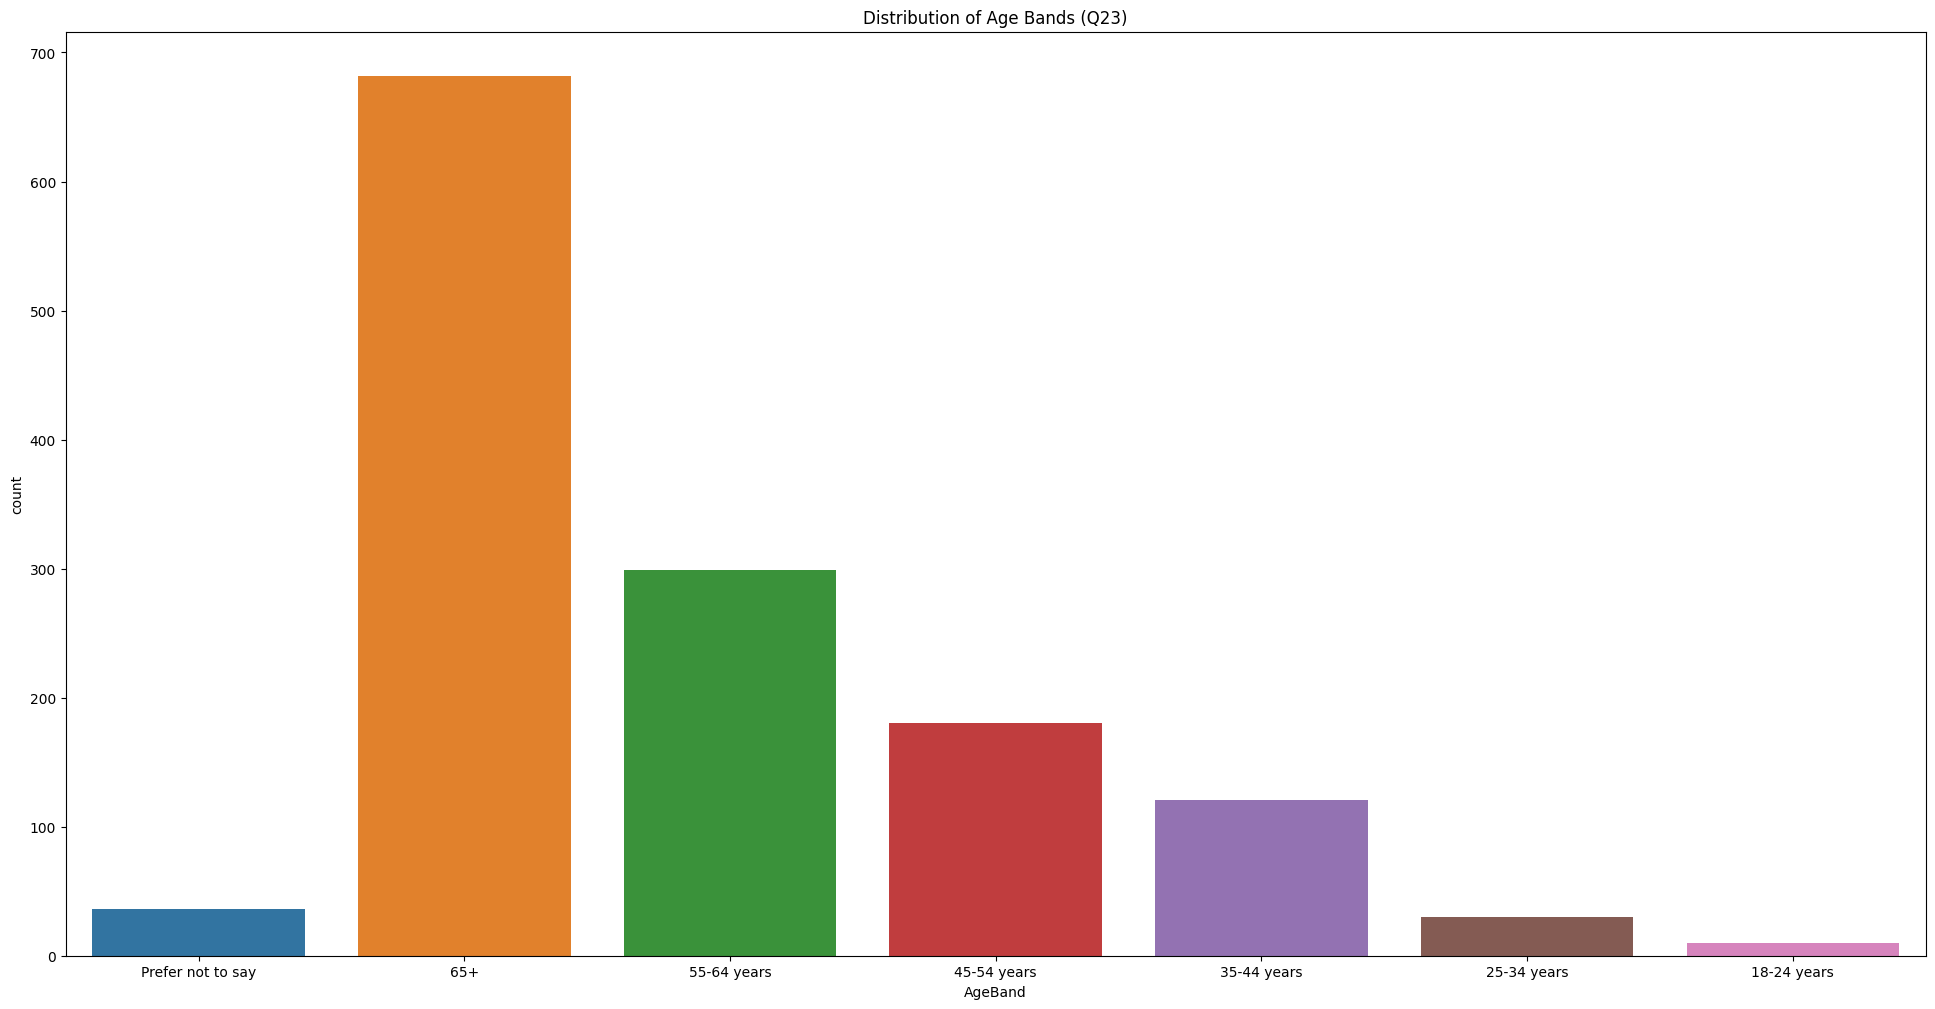

In [39]:
if df["AgeBand"].dtype.kind in ('i','f'):  # just checking if it's numeric
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x="AgeBand", bins=5, kde=True)
    plt.title("Distribution of Age (Q23)")
    plt.show()
else:
    plt.figure(figsize=(24,12))
    sns.countplot(x="AgeBand", data=df)
    plt.title("Distribution of Age Bands (Q23)")
    plt.show()


## 2.2. Cross Tab

Crosstab of Income vs. Owns EV (Q1_2):
Q1_2                                                0    1
Q24                                                       
$1000-2000 a week / $52,000-$104,000 a year       130  153
$2000-3000 a week / $104,000-$156,000 a year       74  132
$3000-4000 a week / $156,000-$208,000 a year       37   86
$4000+ a week / $208,000+ a year                   44  145
$500-1000 a week / $26,000-$52,000 a year         101   64
Less than $500 a week / Less than $26,000 a year   33   18
Prefer not to say                                 171  170


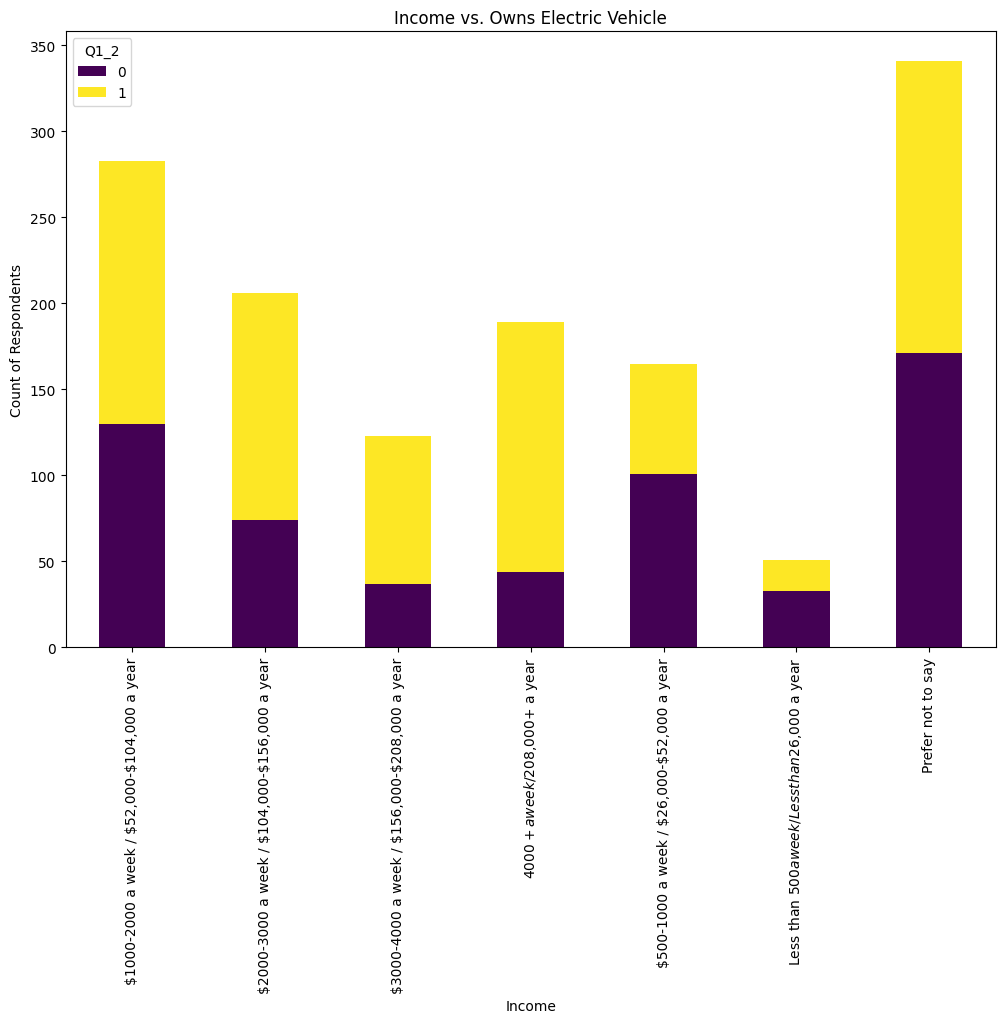

In [35]:
ct = pd.crosstab(df["Q24"], df["Q1_2"])
print("Crosstab of Income vs. Owns EV (Q1_2):")
print(ct)

# We can visualize as a bar chart
ct.plot(kind='bar', stacked=True, figsize=(12,8), colormap='viridis')
plt.title("Income vs. Owns Electric Vehicle")
plt.xlabel("Income")
plt.ylabel("Count of Respondents")
plt.show()

## 2.3. Charging Habits

In [48]:
# Q6a => weekdays, Q6b => weekends
# x1 => petrol, x2 => EV, x3 => plug-in hybrid, x4 => hybrid
# Each has 3 time periods: _1 => 10am-3pm, _2 => 4pm-9pm, _3 => 9pm-6am

# Weekday columns
q6a_petrol   = ["Q6ax1_1","Q6ax1_2","Q6ax1_3"]  # petrol on weekdays
q6a_ev       = ["Q6ax2_1","Q6ax2_2","Q6ax2_3"]  # EV on weekdays
q6a_plughyb  = ["Q6ax3_1","Q6ax3_2","Q6ax3_3"]  # plug-in hybrid weekdays
q6a_hybrid   = ["Q6ax4_1","Q6ax4_2","Q6ax4_3"]  # hybrid weekdays

# Weekend columns
q6b_petrol   = ["Q6bx1_1","Q6bx1_2","Q6bx1_3"]
q6b_ev       = ["Q6bx2_1","Q6bx2_2","Q6bx2_3"]
q6b_plughyb  = ["Q6bx3_1","Q6bx3_2","Q6bx3_3"]
q6b_hybrid   = ["Q6bx4_1","Q6bx4_2","Q6bx4_3"]

# Combine them if you want to pull them all at once:
weekday_cols = q6a_petrol + q6a_ev + q6a_plughyb + q6a_hybrid
weekend_cols = q6b_petrol + q6b_ev + q6b_plughyb + q6b_hybrid
all_q6_cols = weekday_cols + weekend_cols

In [50]:
data_rows = pull_data_rowwise(columns_of_interest, csv_file)
df = pd.DataFrame(data_rows, columns=columns_of_interest)

# Convert to numeric. If any row is e.g. '' or 'NA', we set them to NaN
for col in columns_of_interest:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [51]:
df

,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,Q6ax2_3,Q6ax3_1,Q6ax3_2,Q6ax3_3,Q6ax4_1,...,Q6bx1_3,Q6bx2_1,Q6bx2_2,Q6bx2_3,Q6bx3_1,Q6bx3_2,Q6bx3_3,Q6bx4_1,Q6bx4_2,Q6bx4_3
0,3.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0
4,5.0,5.0,5.0,4.0,4.0,4.0,NaN,NaN,NaN,2.0,...,2.0,1.0,1.0,2.0,NaN,NaN,NaN,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,NaN,NaN,NaN,1.0,3.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1354,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1355,4.0,4.0,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN,...,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1356,NaN,NaN,NaN,3.0,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
def plot_columns_hist(dataframe, col_list, title_prefix=""):
    """
    Creates a grid of histograms for the columns in col_list.
    """
    n = len(col_list)
    fig, axes = plt.subplots(n, 1, figsize=(6, 3*n))
    if n == 1:
        axes = [axes]  # ensure iterable

    for i, c in enumerate(col_list):
        # drop NaNs
        series = dataframe[c].dropna()
        if series.empty:
            axes[i].set_title(f"No data for {c}")
            continue
        # We treat them as discrete integers (0..5 typically)
        sns.histplot(series, discrete=True, ax=axes[i], kde=False)
        axes[i].set_title(f"{title_prefix} distribution: {c}")
        axes[i].set_xlabel("Days at home (count)")
    plt.tight_layout()
    plt.show()


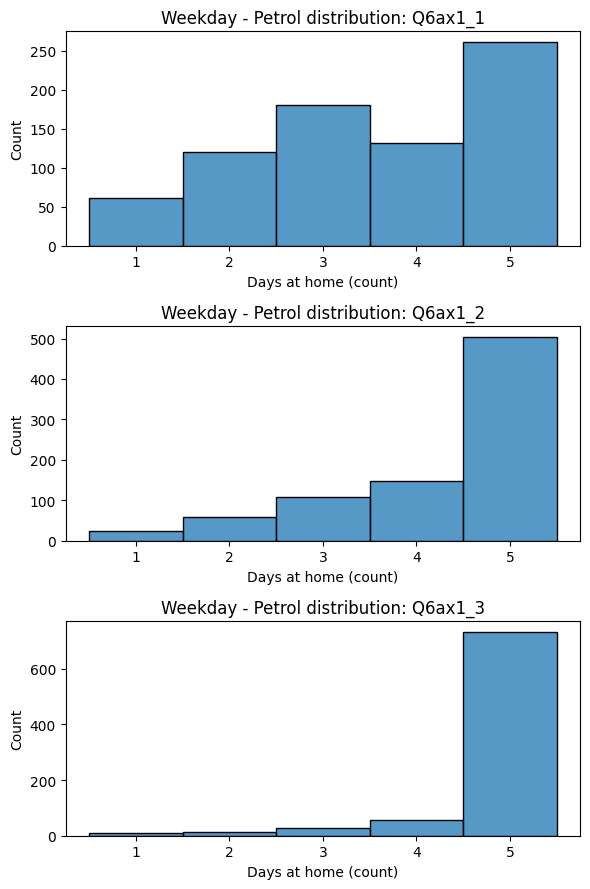

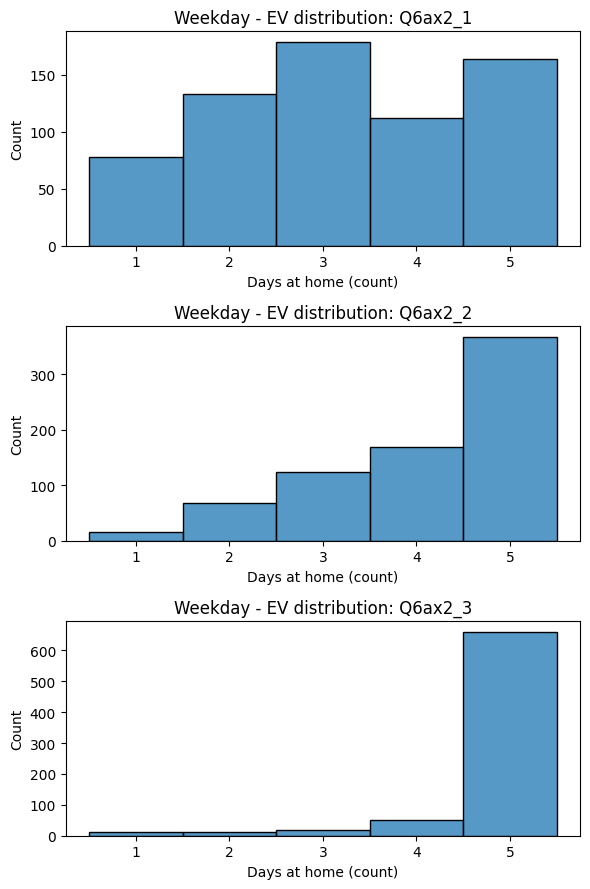

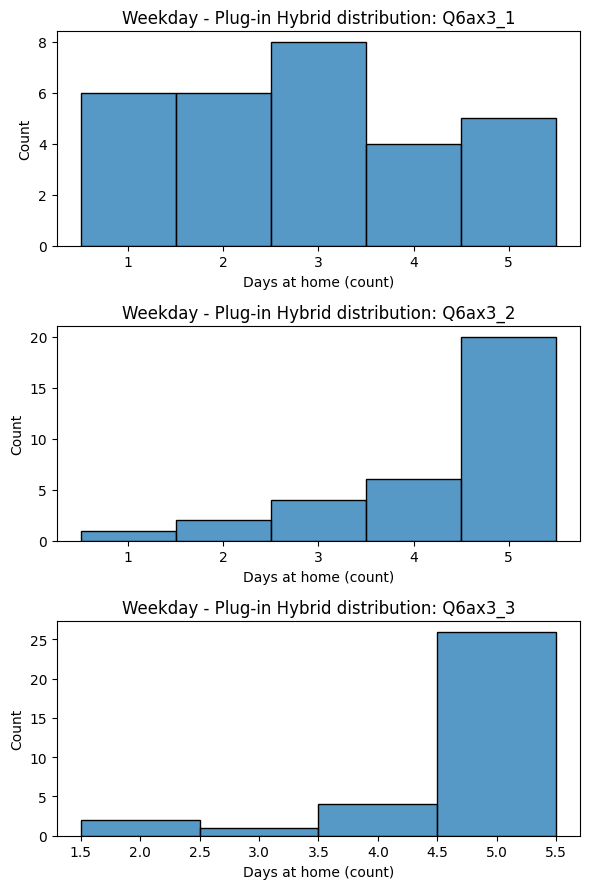

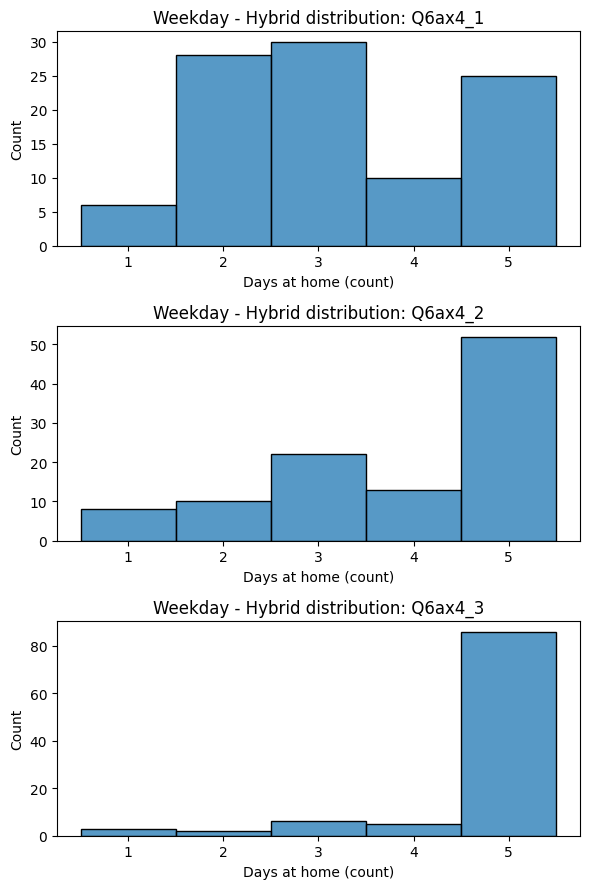

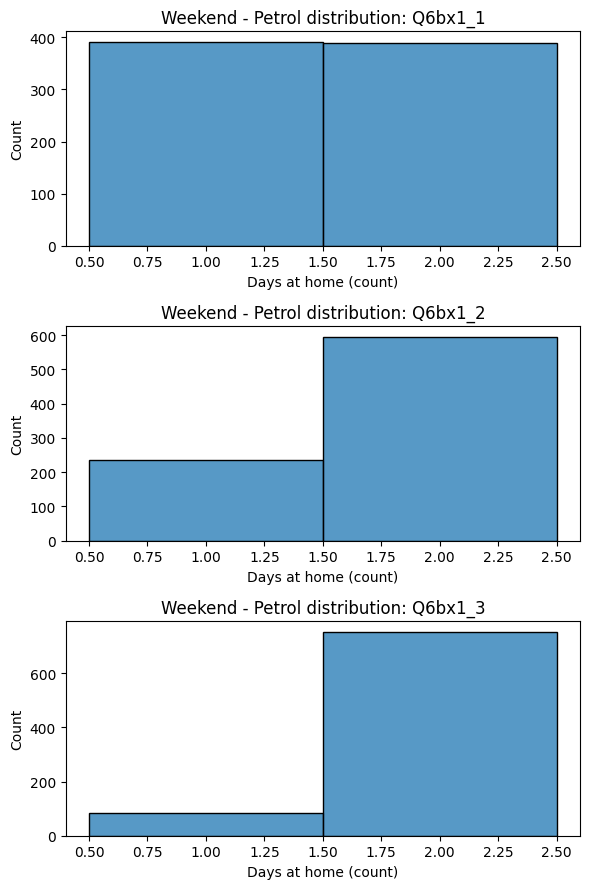

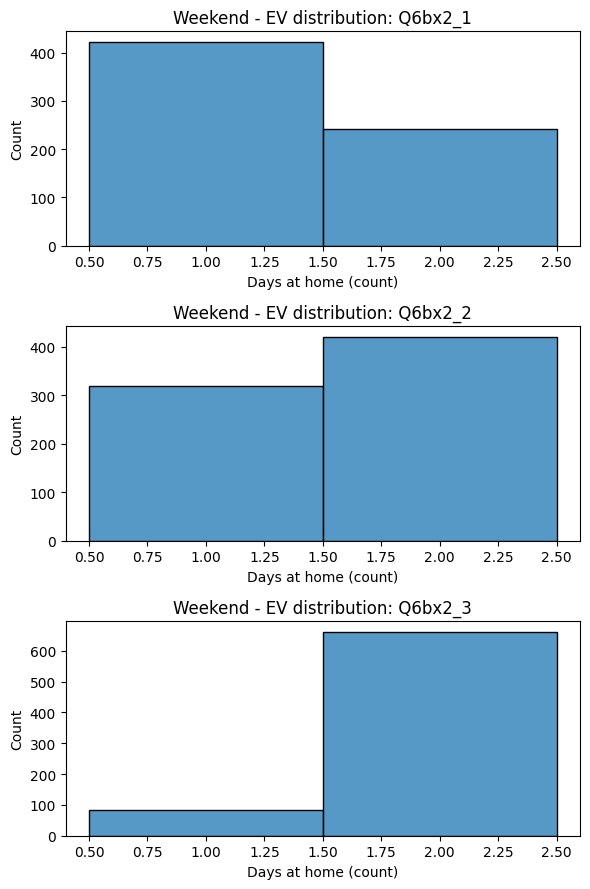

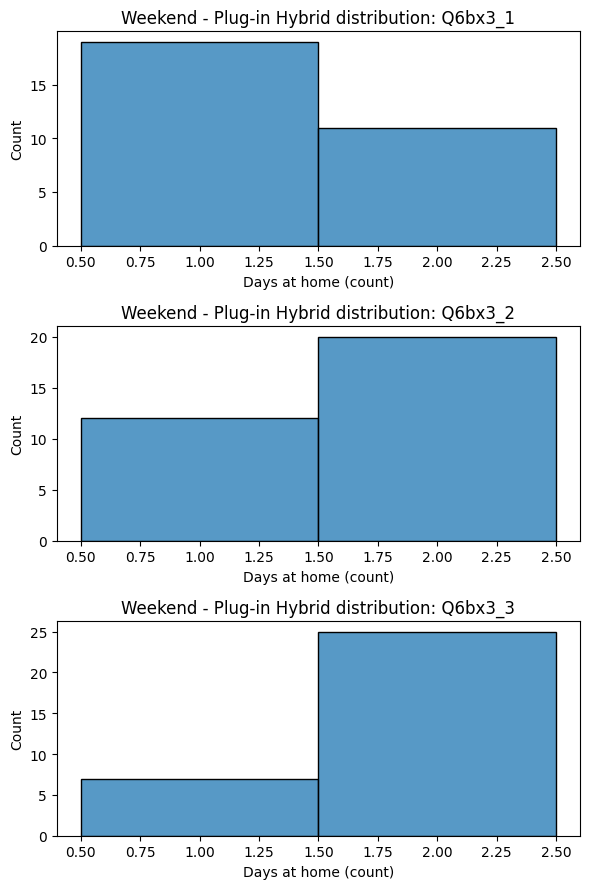

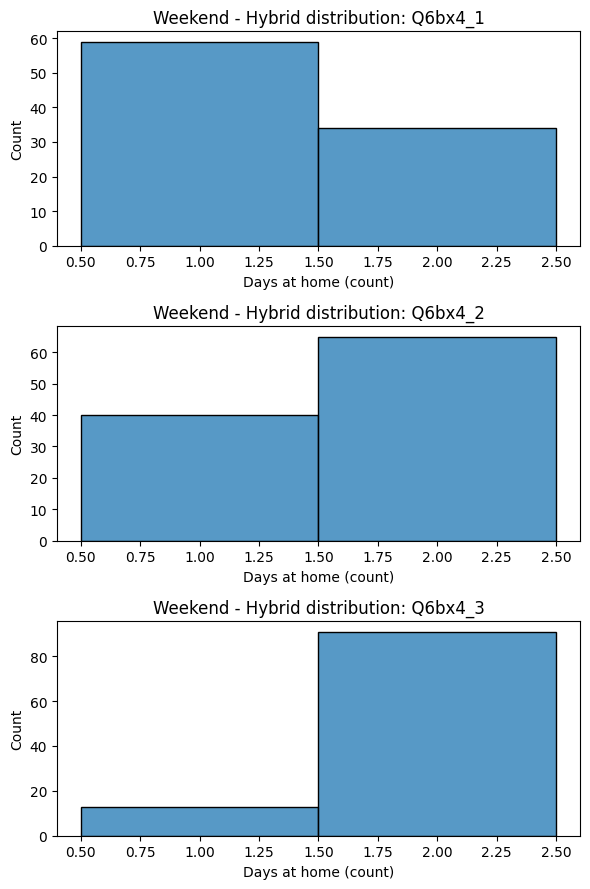

In [53]:
# A) Plot weekdays
plot_columns_hist(df, q6a_petrol,  title_prefix="Weekday - Petrol")
plot_columns_hist(df, q6a_ev,      title_prefix="Weekday - EV")
plot_columns_hist(df, q6a_plughyb, title_prefix="Weekday - Plug-in Hybrid")
plot_columns_hist(df, q6a_hybrid,  title_prefix="Weekday - Hybrid")

# B) Plot weekends
plot_columns_hist(df, q6b_petrol,  title_prefix="Weekend - Petrol")
plot_columns_hist(df, q6b_ev,      title_prefix="Weekend - EV")
plot_columns_hist(df, q6b_plughyb, title_prefix="Weekend - Plug-in Hybrid")
plot_columns_hist(df, q6b_hybrid,  title_prefix="Weekend - Hybrid")


## 2.3.B

In [57]:
##########################################
# 0) Define your Q6 (weekdays) columns by vehicle + time
##########################################
# "Q6ax1" => weekdays, x1 => petrol/diesel
# "Q6ax2" => weekdays, x2 => electric
# "Q6ax3" => weekdays, x3 => plug-in hybrid
# "Q6ax4" => weekdays, x4 => hybrid

# Each has 3 time periods: _1 => 10am-3pm, _2 => 4pm-9pm, _3 => 9pm-6am

q6a_petrol = ["Q6ax1_1","Q6ax1_2","Q6ax1_3"]       # weekdays, petrol/diesel
q6a_ev     = ["Q6ax2_1","Q6ax2_2","Q6ax2_3"]       # weekdays, EV
q6a_plughyb= ["Q6ax3_1","Q6ax3_2","Q6ax3_3"]       # weekdays, plug-in hybrid
q6a_hybrid = ["Q6ax4_1","Q6ax4_2","Q6ax4_3"]       # weekdays, hybrid

# Combine them all for weekdays
q6a_cols = q6a_petrol + q6a_ev + q6a_plughyb + q6a_hybrid

In [ ]:
##########################################
# Also define the demographic columns
##########################################
demo_cols = ["gender","colour_plus","region","Q21","Q22","AgeBand","Q24"]

In [58]:
##########################################
# Pull the data from CSV
##########################################
init_column_map(csv_file)

# We'll get both Q6a columns and the demographic columns
columns_of_interest = q6a_cols + demo_cols
rows = pull_data_rowwise(columns_of_interest, csv_file)

# Make a DataFrame
df = pd.DataFrame(rows, columns=columns_of_interest)

df

,Q6ax1_1,Q6ax1_2,Q6ax1_3,Q6ax2_1,Q6ax2_2,Q6ax2_3,Q6ax3_1,Q6ax3_2,Q6ax3_3,Q6ax4_1,Q6ax4_2,Q6ax4_3,gender,colour_plus,region,Q21,Q22,AgeBand,Q24
0,3,5,5,,,,,,,,,,Male,LILAC,METROPOLITAN,Freestanding house,Own outright,Prefer not to say,Prefer not to say
1,5,5,5,5,5,5,,,,,,,Male,LILAC,RURAL,Freestanding house,Own outright,Prefer not to say,Prefer not to say
2,2,1,2,,,,,,,,,,Not Stated,KHAKI,INTERSTATE,Townhouse,Own outright,65+,"$1000-2000 a week / $52,000-$104,000 a year"
3,,,,,,,,,,0 - Weekdays,5,5,Male,PURPLE,METROPOLITAN,Freestanding house,Own outright,55-64 years,Prefer not to say
4,5,5,5,4,4,4,,,,2,2,5,Male,PURPLE,INTERSTATE,Freestanding house,Own with mortgage,45-54 years,Prefer not to say
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1353,,,,1,3,5,,,,,,,Female,KHAKI,REGIONAL,Townhouse,Own outright,55-64 years,Prefer not to say
1354,5,5,5,,,,,,,,,,Male,LILAC,REGIONAL,Apartment/unit,Own outright,65+,"$1000-2000 a week / $52,000-$104,000 a year"
1355,4,4,5,4,4,5,,,,,,,Male,GREY,REGIONAL,Freestanding house,Own outright,65+,"$2000-3000 a week / $104,000-$156,000 a year"
1356,,,,3,5,5,,,,,,,Male,LILAC,RURAL,Other (please specify),Other (please specify),65+,"Less than $500 a week / Less than $26,000 a year"


In [59]:
# Convert Q6a columns to numeric
for c in q6a_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

print("Head of DataFrame:")
print(df.head())

print("Info:")
print(df.info())

Head of DataFrame:
   Q6ax1_1  Q6ax1_2  Q6ax1_3  Q6ax2_1  Q6ax2_2  Q6ax2_3  Q6ax3_1  Q6ax3_2  \
0      3.0      5.0      5.0      NaN      NaN      NaN      NaN      NaN   
1      5.0      5.0      5.0      5.0      5.0      5.0      NaN      NaN   
2      2.0      1.0      2.0      NaN      NaN      NaN      NaN      NaN   
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4      5.0      5.0      5.0      4.0      4.0      4.0      NaN      NaN   

   Q6ax3_3  Q6ax4_1  Q6ax4_2  Q6ax4_3      gender colour_plus        region  \
0      NaN      NaN      NaN      NaN        Male       LILAC  METROPOLITAN   
1      NaN      NaN      NaN      NaN        Male       LILAC         RURAL   
2      NaN      NaN      NaN      NaN  Not Stated       KHAKI    INTERSTATE   
3      NaN      NaN      5.0      5.0        Male      PURPLE  METROPOLITAN   
4      NaN      2.0      2.0      5.0        Male      PURPLE    INTERSTATE   

                  Q21                Q22   

In [60]:
##########################################
# Summaries & distributions
##########################################
# Let's do a quick describe on the Q6a numeric columns
print("Describe (Q6a numeric columns):")
print(df[q6a_cols].describe())

Describe (Q6a numeric columns):
          Q6ax1_1     Q6ax1_2     Q6ax1_3     Q6ax2_1     Q6ax2_2    Q6ax2_3  \
count  756.000000  846.000000  843.000000  666.000000  744.000000  754.00000   
mean     3.547619    4.239953    4.766311    3.226727    4.084677    4.77321   
std      1.320890    1.102063    0.703709    1.331382    1.096713    0.71059   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.00000   
25%      3.000000    4.000000    5.000000    2.000000    3.000000    5.00000   
50%      4.000000    5.000000    5.000000    3.000000    4.000000    5.00000   
75%      5.000000    5.000000    5.000000    4.000000    5.000000    5.00000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.00000   

         Q6ax3_1    Q6ax3_2    Q6ax3_3   Q6ax4_1     Q6ax4_2     Q6ax4_3  
count  29.000000  33.000000  33.000000  99.00000  105.000000  102.000000  
mean    2.862069   4.272727   4.636364   3.20202    3.866667    4.656863  
std     1.381618   1.0

In [61]:
# histogram for each Q6a column
def plot_q6a_histograms(dataframe, col_list, title_prefix=""):
    n = len(col_list)
    fig, axes = plt.subplots(n, 1, figsize=(6, 3*n))
    if n == 1:
        axes = [axes]  # ensure it's iterable

    for i, col in enumerate(col_list):
        series = dataframe[col].dropna()
        if series.empty:
            axes[i].set_title(f"No data for {col}")
            continue
        sns.histplot(series, kde=False, discrete=True, ax=axes[i])
        axes[i].set_title(f"{title_prefix}{col}")
        axes[i].set_xlabel("Days at home")
    plt.tight_layout()
    plt.show()


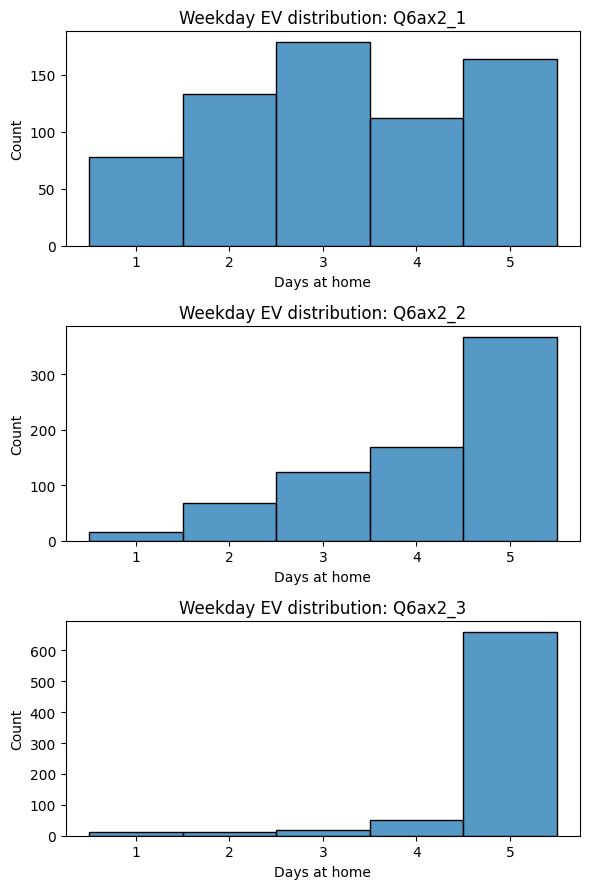

In [62]:
# e.g. look at just the EV columns (Q6ax2_*) for a start
plot_q6a_histograms(df, q6a_ev, title_prefix="Weekday EV distribution: ")

Mean Q6ax2_1 by Q21:
 Q21
Apartment/unit             3.298701
Freestanding house         3.218569
Other (please specify)     3.000000
Semidetached or terrace    3.218750
Townhouse                  3.250000
Name: Q6ax2_1, dtype: float64


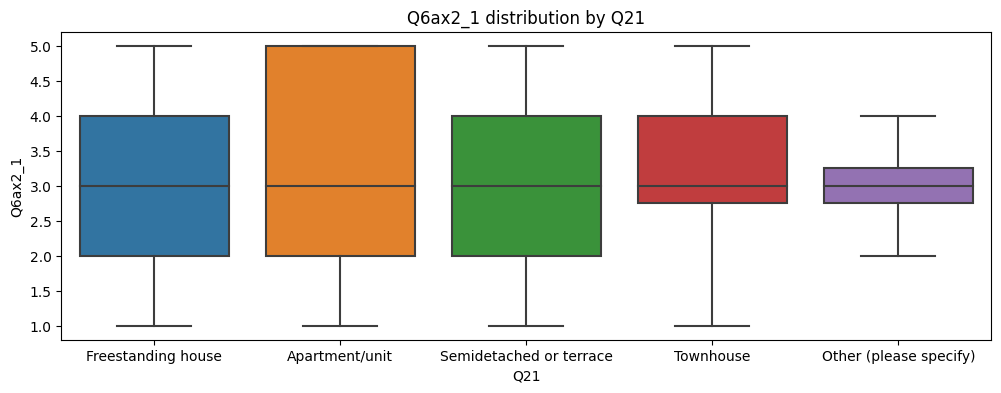

In [75]:
##########################################
# Cross-sections with demographics
##########################################
# For instance, let's group by "gender" and see the average # of days at home 
# for Q6ax2_1 (weekdays, EV, 10am-3pm)

group_col = "Q21"
target_col = "Q6ax2_1"  # example

# drop missing
df_sub = df[[group_col, target_col]].dropna()
df_sub[target_col] = pd.to_numeric(df_sub[target_col], errors="coerce")

grouped = df_sub.groupby(group_col)[target_col].mean()
print(f"Mean {target_col} by {group_col}:\n", grouped)

# Alternatively, a boxplot by demographic
plt.figure(figsize=(12,4))
sns.boxplot(x=group_col, y=target_col, data=df_sub)
plt.title(f"{target_col} distribution by {group_col}")
plt.show()

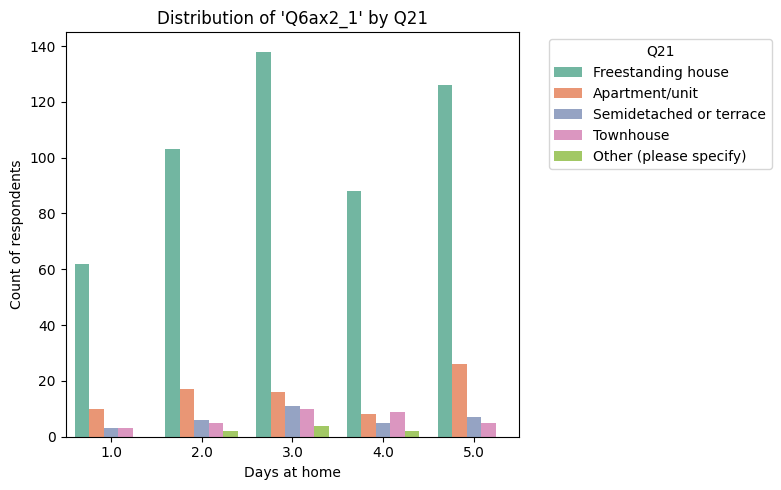

In [79]:
group_col = "Q21"        # e.g. "What kind of home do you live in?"
target_col = "Q6ax2_1"   # e.g. number of weekdays (Mon-Fri) an EV is at home 10am–3pm

# 1) Filter out rows where either is missing
df_sub = df[[group_col, target_col]].dropna()

# 2) Convert target_col to numeric if it's not already
df_sub[target_col] = pd.to_numeric(df_sub[target_col], errors="coerce")

# 3) If you want the distribution as discrete categories (0..5), 
#    you can convert them to string or keep them numeric. 
#    For a count plot, either approach works, but using discrete=True can help.

plt.figure(figsize=(8, 5))
sns.countplot(
    x=target_col, 
    hue=group_col,       # color-coded by Q21 categories
    data=df_sub,
    palette="Set2"
)
plt.title(f"Distribution of '{target_col}' by {group_col}")
plt.xlabel("Days at home")
plt.ylabel("Count of respondents")
plt.legend(title=group_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Crosstab of AgeBand vs number of days (EV @ 10am-3pm weekdays):
days_str            1   2    3   4   5
AgeBand                               
18-24 years         0   1    0   0   0
25-34 years         1   4    2   2   6
35-44 years        10   9   11   9  14
45-54 years        11   9   17  16  31
55-64 years        18  28   40  25  35
65+                37  79  105  60  71
Prefer not to say   1   3    4   0   7


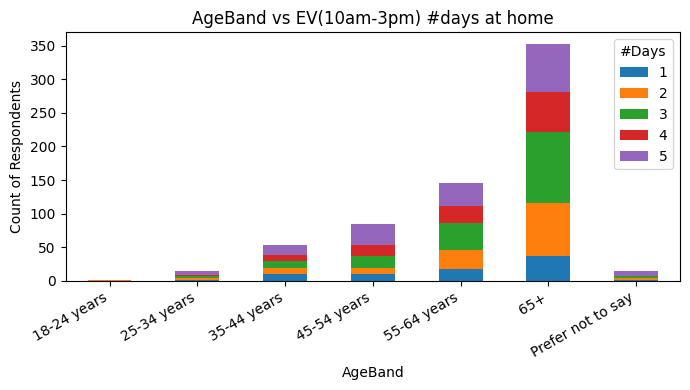

Done analyzing weekday Q6 data with demographics.


In [ ]:
##########################################
# Another cross-tab
##########################################
# Compare a Q6a EV column with a demographic variable (like AgeBand).
# We'll do a cross-tab where the rows are AgeBand, columns are the #days?

q6_ev_col = "Q6ax2_1"  # e.g. EV, weekday, 10am-3pm
df_ct = df[[q6_ev_col, "AgeBand"]].dropna()

# Because Q6_ev_col is numeric, we might convert it to a string 
# if we want a cross-tab of discrete integer values
df_ct["days_str"] = df_ct[q6_ev_col].astype(int).astype(str)

ct = pd.crosstab(df_ct["AgeBand"], df_ct["days_str"])
print("Crosstab of AgeBand vs number of days (EV @ 10am-3pm weekdays):")
print(ct)

# We can plot this crosstab as a stacked bar or heatmap:
ct.plot(kind='bar', stacked=True, figsize=(7,4))
plt.title("AgeBand vs EV(10am-3pm) #days at home")
plt.xlabel("AgeBand")
plt.ylabel("Count of Respondents")
plt.xticks(rotation=30, ha='right')
plt.legend(title="#Days")
plt.tight_layout()
plt.show()

##########################################
# End
##########################################
print("Done analyzing weekday Q6 data with demographics.")


## 2.3.C.

In [86]:
def parse_q6_value(x):
    """
    Interprets the raw cell data for Q6 columns.
    - If empty or None, or the string has "0 - Weekdays" or similar, treat as 0.
    - Otherwise, try to parse as float.
    - If parse fails, default to 0.
    """
    if pd.isnull(x):
        return 0
    x_str = str(x).strip()
    if x_str == "" or "0 - Weekdays" in x_str:
        return 0
    try:
        return float(x_str)
    except:
        return 0

In [87]:
# We'll get both Q6a columns and the demographic columns
columns_of_interest = q6a_cols + demo_cols
rows = pull_data_rowwise(columns_of_interest, csv_file)

# Make a DataFrame
df = pd.DataFrame(rows, columns=columns_of_interest)

##########################################
# 2) Preprocess the Q6a columns
##########################################
for c in q6a_cols:
    # Apply the parse_q6_value function to each cell
    df[c] = df[c].apply(parse_q6_value)
    # Optionally cast to int if you're sure it's discrete 0..5
    # df[c] = df[c].astype(int)

print("\nHead of DataFrame:")
print(df.head())

print("\nInfo:")
print(df.info())



Head of DataFrame:
   Q6ax1_1  Q6ax1_2  Q6ax1_3  Q6ax2_1  Q6ax2_2  Q6ax2_3  Q6ax3_1  Q6ax3_2  \
0      3.0      5.0      5.0      0.0      0.0      0.0      0.0      0.0   
1      5.0      5.0      5.0      5.0      5.0      5.0      0.0      0.0   
2      2.0      1.0      2.0      0.0      0.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4      5.0      5.0      5.0      4.0      4.0      4.0      0.0      0.0   

   Q6ax3_3  Q6ax4_1  Q6ax4_2  Q6ax4_3      gender colour_plus        region  \
0      0.0      0.0      0.0      0.0        Male       LILAC  METROPOLITAN   
1      0.0      0.0      0.0      0.0        Male       LILAC         RURAL   
2      0.0      0.0      0.0      0.0  Not Stated       KHAKI    INTERSTATE   
3      0.0      0.0      5.0      5.0        Male      PURPLE  METROPOLITAN   
4      0.0      2.0      2.0      5.0        Male      PURPLE    INTERSTATE   

                  Q21                Q22  


Describe (Q6a numeric columns):
           Q6ax1_1      Q6ax1_2      Q6ax1_3      Q6ax2_1      Q6ax2_2  \
count  1358.000000  1358.000000  1358.000000  1358.000000  1358.000000   
mean      1.974963     2.641384     2.958763     1.582474     2.237850   
std       2.019644     2.232003     2.378932     1.863480     2.189641   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       2.000000     3.000000     5.000000     0.000000     2.000000   
75%       4.000000     5.000000     5.000000     3.000000     5.000000   
max       5.000000     5.000000     5.000000     5.000000     5.000000   

           Q6ax2_3      Q6ax3_1      Q6ax3_2      Q6ax3_3      Q6ax4_1  \
count  1358.000000  1358.000000  1358.000000  1358.000000  1358.000000   
mean      2.650221     0.061119     0.103829     0.112666     0.233432   
std       2.431198     0.459026     0.679395     0.725248     0.899931   
min 

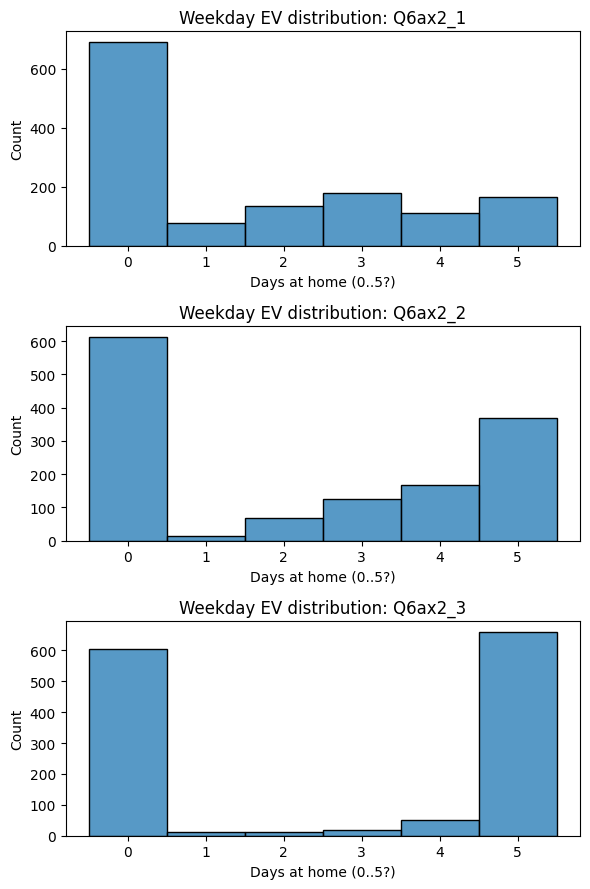

In [88]:
# Let's do a quick describe on the Q6a numeric columns
print("\nDescribe (Q6a numeric columns):")
print(df[q6a_cols].describe())

# Define a function to plot histograms for Q6a columns
def plot_q6a_histograms(dataframe, col_list, title_prefix=""):
    n = len(col_list)
    fig, axes = plt.subplots(n, 1, figsize=(6, 3*n), sharex=False)
    if n == 1:
        axes = [axes]  # ensure iterable

    for i, col in enumerate(col_list):
        series = dataframe[col]  # already cleaned, no need to dropna if we treat missing as 0
        sns.histplot(series, kde=False, discrete=True, ax=axes[i], color="C0")
        axes[i].set_title(f"{title_prefix}{col}")
        axes[i].set_xlabel("Days at home (0..5?)")
        axes[i].set_ylabel("Count")
    plt.tight_layout()
    plt.show()

# Example: histogram for the EV columns (Q6ax2_*)
plot_q6a_histograms(df, q6a_ev, title_prefix="Weekday EV distribution: ")


Mean Q6ax2_1 by Q21:
 Q21
Semidetached or terrace    1.661290
Freestanding house         1.623415
Townhouse                  1.464789
Apartment/unit             1.418994
Other (please specify)     1.142857
Name: Q6ax2_1, dtype: float64


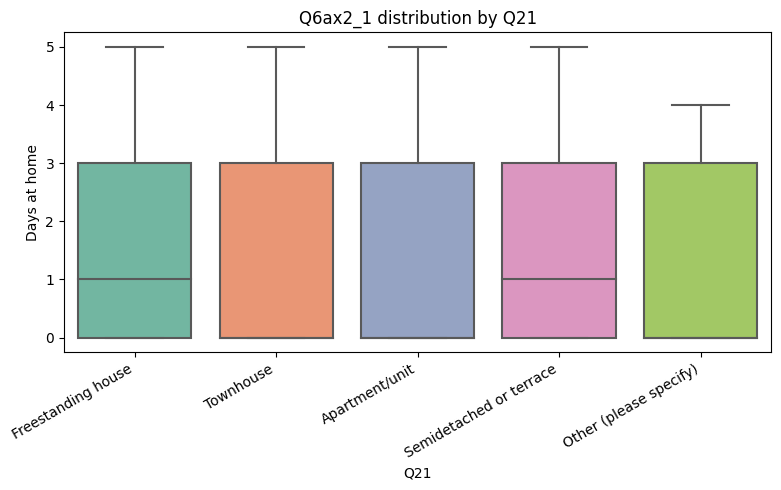

In [89]:
group_col = "Q21"        # e.g. "What kind of home do you live in?"
target_col = "Q6ax2_1"   # e.g. # of weekdays (Mon-Fri) an EV is at home 10am–3pm

# We'll group by "Q21" and see the average # of days
df_sub = df[[group_col, target_col]].copy()

# groupby
grouped = df_sub.groupby(group_col)[target_col].mean().sort_values(ascending=False)
print(f"\nMean {target_col} by {group_col}:\n", grouped)

# A boxplot by demographic group
plt.figure(figsize=(8,5))
sns.boxplot(x=group_col, y=target_col, data=df_sub, palette="Set2")
plt.title(f"{target_col} distribution by {group_col}")
plt.xlabel(group_col)
plt.ylabel("Days at home")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

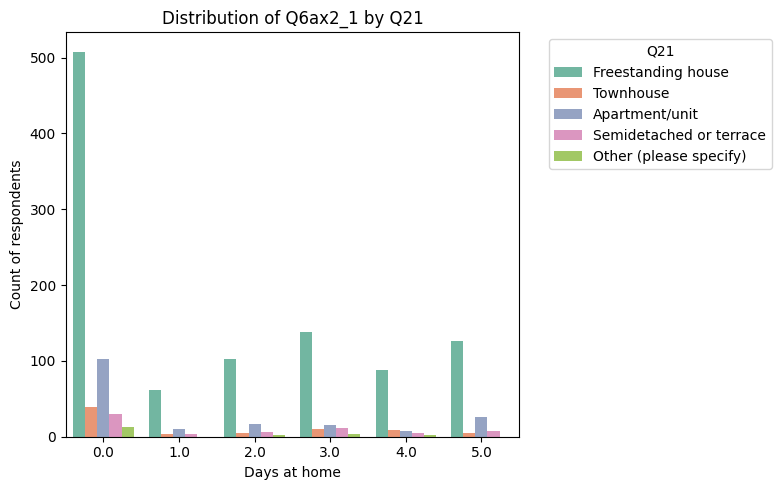

In [91]:
plt.figure(figsize=(8,5))
sns.countplot(
    x=target_col,
    hue=group_col,
    data=df_sub,
    palette="Set2",
    # For discrete 0..5 days, it helps to define an order if you'd like
    # order=[0,1,2,3,4,5] if you want to fix x-axis
)

plt.title(f"Distribution of {target_col} by {group_col}")
plt.xlabel("Days at home")
plt.ylabel("Count of respondents")
plt.legend(title=group_col, bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Comparative analytics

In [4]:
q21_categories = [
    "Freestanding house", 
    "Townhouse", 
    "Semidetached or terrace",
    "Apartment/unit",
    "Other (please specify)"
    ]


q10_2_categories = [
    "Strongly disagree",
    "Somewhat disagree",
    "Neither agree nor disagree",
    "Somewhat agree",
    "Strongly agree"
    ]

### Here we can keep going with other categories we want to disaggregate ###

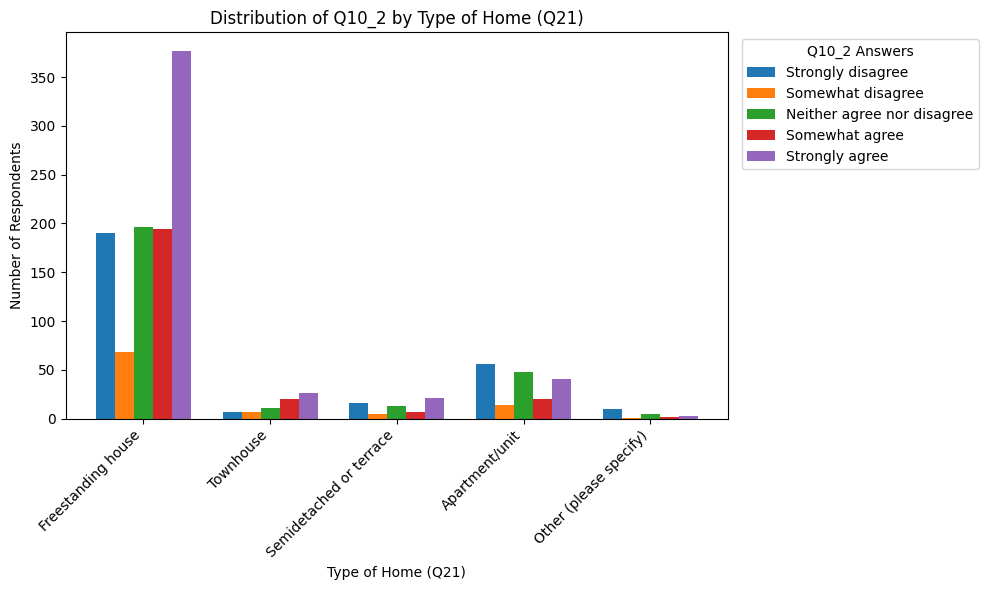

In [5]:
plot_demographic_vs_Q10_2('Q21', q21_categories, q10_2_categories, csv_file)